In [8]:
from scipy.io import loadmat
import pandas as pd
mat = loadmat('./data/live_wild/ChallengeDB_release/Data/AllImages_release.mat')
all_img = mat['AllImages_release']

In [9]:
mos_mat = loadmat('./data/live_wild/ChallengeDB_release/Data/AllMOS_release.mat')
all_mos = mos_mat['AllMOS_release'][0]
stddev_mat = loadmat('./data/live_wild/ChallengeDB_release/Data/AllStdDev_release.mat')
all_stddev = stddev_mat['AllStdDev_release'][0]


In [10]:
print(f'len(all_img): {len(all_img)}; len(all_mos): {len(all_mos)}; len(all_stddev): {len(all_stddev)}')

data = [{'name': all_img[i][0][0], 'mos': all_mos[i], 'stddev': all_stddev[i]} for i in range(len(all_img))]
df = pd.DataFrame(data)

df.to_csv('./data/live_wild/data.csv', index=False)

len(all_img): 1169; len(all_mos): 1169; len(all_stddev): 1169


/home/cuichuan/miniconda3/envs/cls/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cuichuan/miniconda3/envs/cls/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'MOS_quality/align')

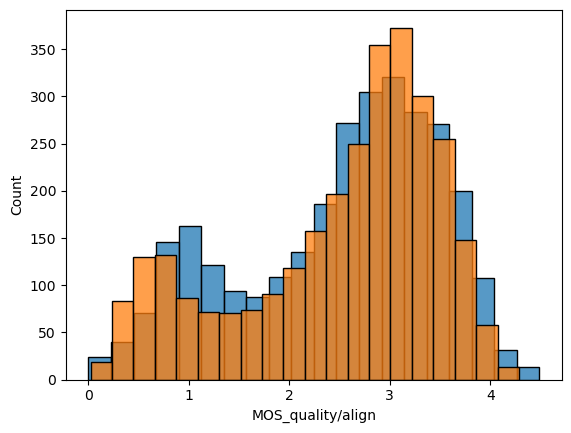

In [11]:
# AGIQA-3K, scores distribution
import seaborn as sns

data_agiqa_3k = pd.read_csv('./data/agiqa-3k/data.csv')
mos_quality = data_agiqa_3k['mos_quality']
mos_align = data_agiqa_3k['mos_align']
sns.histplot(mos_quality, bins=20)
sns.histplot(mos_align, bins=20)
# set x label
import matplotlib.pyplot as plt
plt.xlabel('MOS_quality/align')


/home/cuichuan/miniconda3/envs/cls/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cuichuan/miniconda3/envs/cls/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cuichuan/miniconda3/envs/cls/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'MOS_quality/align/c')

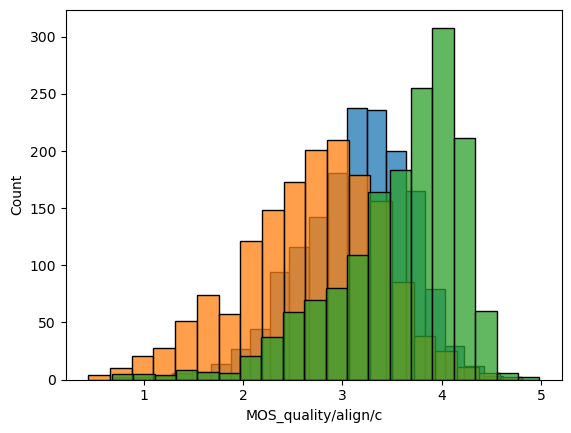

In [12]:
data_pkuiqa = pd.read_csv('./data/i2iqa/data.csv')
mos_q = data_pkuiqa['MOS_q']
mos_a = data_pkuiqa['MOS_a']
mos_c = data_pkuiqa['MOS_c']

sns.histplot(mos_q, bins=20)
sns.histplot(mos_a, bins=20)
sns.histplot(mos_c, bins=20)

plt.xlabel('MOS_quality/align/c')


/home/cuichuan/miniconda3/envs/cls/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mos', ylabel='Count'>

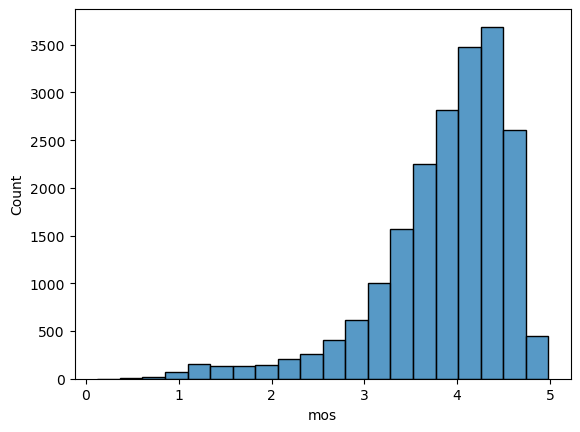

In [13]:
data_aigciqa_30k = pd.read_csv('./data/aigciqa-30k/data.csv')
mos = data_aigciqa_30k['mos']
sns.histplot(mos, bins=20)

In [14]:
# AIGCIQA2023
from tqdm import tqdm

aigciqa2023_mosz1_mat = loadmat('./data/AIGCIQA2023/DATA/MOS/mosz1.mat')
aigciqa2023_mosz1 = aigciqa2023_mosz1_mat['MOSz']
aigciqa2023_mosz2_mat = loadmat('./data/AIGCIQA2023/DATA/MOS/mosz2.mat')
aigciqa2023_mosz2 = aigciqa2023_mosz2_mat['MOSz']
aigciqa2023_mosz3_mat = loadmat('./data/AIGCIQA2023/DATA/MOS/mosz3.mat')
aigciqa2023_mosz3 = aigciqa2023_mosz3_mat['MOSz']

aigciqa2023_std1_mat = loadmat('./data/AIGCIQA2023/DATA/STD/SD1.mat')
aigciqa2023_std1 = aigciqa2023_std1_mat['SD']
aigciqa2023_std2_mat = loadmat('./data/AIGCIQA2023/DATA/STD/SD2.mat')
aigciqa2023_std2 = aigciqa2023_std2_mat['SD']
aigciqa2023_std3_mat = loadmat('./data/AIGCIQA2023/DATA/STD/SD3.mat')
aigciqa2023_std3 = aigciqa2023_std3_mat['SD']

prompts = pd.read_excel('./data/AIGCIQA2023/AIGCIQA2023_Prompts.xlsx', header=None, dtype=str)
prompts = {'category': list(prompts[0]), 'subcategory': list(prompts[1]), 'prompt': list(prompts[2])}
prompts

pic_index = pd.read_excel('./data/AIGCIQA2023/pic-index.xlsx', header=None, dtype=str)


datas = []
for i in tqdm(range(len(aigciqa2023_mosz1))):
    data = {'name': f'{i}.png', 'mos_quality': aigciqa2023_mosz1[i][0], 'mos_authenticity': aigciqa2023_mosz2[i][0], 'mos_correspondence': aigciqa2023_mosz3[i][0], 'std_quality': aigciqa2023_std1[i][0], 'std_authenticity': aigciqa2023_std2[i][0], 'std_correspondence': aigciqa2023_std3[i][0]}
    data['from'] = pic_index[0][i]
    prompt_index = int(pic_index[1][i][:pic_index[1][i].index('-')])
    data['category'] = prompts['category'][prompt_index]
    data['subcategory'] = prompts['subcategory'][prompt_index]
    data['prompt'] = prompts['prompt'][prompt_index]
    datas.append(data)

datas = pd.DataFrame(datas)
# datas.to_csv('./data/AIGCIQA2023/data.csv', index=False)
    

100%|██████████| 2400/2400 [00:00<00:00, 69646.79it/s]
